Just playing around with stuff

In [24]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

def kmeansTrial(fitData,totClusters):
  wcss = []
  for i in range(1, totClusters):
    k_means = KMeans(n_clusters=i, init='k-means++', random_state=150)
    k_means.fit_predict(fitData)
    wcss.append(k_means.inertia_)
  #plot elbow curve
  fig = plt.figure(figsize=(30, 10))
  plt.plot(np.arange(1, totClusters), wcss)
  plt.xticks(np.arange(1, totClusters, step=1), rotation=90)
  plt.xlabel('Clusters')
  plt.ylabel('SSE')
  plt.show()
  
def kmeansExecute(fitData, k):
  '''
  Source: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py
  '''
  reduced_data = PCA(n_components=2).fit_transform(fitData)
  kmeans = KMeans(init="k-means++", n_clusters=k)
  kmeans.fit(reduced_data)

  # Step size of the mesh. Decrease to increase the quality of the VQ.
  h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

  # Plot the decision boundary. For that, we will assign a color to each
  x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
  y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  # Obtain labels for each point in mesh. Use last trained model.
  Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.figure(1)
  plt.clf()
  plt.imshow(
      Z,
      interpolation="nearest",
      extent=(xx.min(), xx.max(), yy.min(), yy.max()),
      cmap=plt.cm.Paired,
      aspect="auto",
      origin="lower",
  )

  plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
  # Plot the centroids as a white X
  centroids = kmeans.cluster_centers_
  plt.scatter(
      centroids[:, 0],
      centroids[:, 1],
      marker="x",
      s=169,
      linewidths=3,
      color="w",
      zorder=10,
  )
  plt.title(
      "K-means clustering on the digits dataset (PCA-reduced data)\n"
      "Centroids are marked with white cross"
  )
  plt.xlim(x_min, x_max)
  plt.ylim(y_min, y_max)
  plt.xticks(())
  plt.yticks(())
  plt.show()

In [19]:
# User based kmeans
import preprocessingFuncts as pp

userData = pp.readUserData()
userData = userData.drop(['user_id','age','zip_code'],axis='columns')
userData

,gender,occupation,age_category
0,1,19,2
1,0,13,5
2,1,20,2
3,1,19,2
4,0,13,3
...,...,...,...
938,0,18,2
939,1,0,3
940,1,18,1
941,0,10,4


In [20]:
itemData = pp.readItemData()
itemData = itemData.drop(['item_id','title','year_category'],axis='columns').dropna()
itemData

,year,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1995.0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1995.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1995.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1995.0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1995.0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1998.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1678,1998.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1679,1998.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1680,1994.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


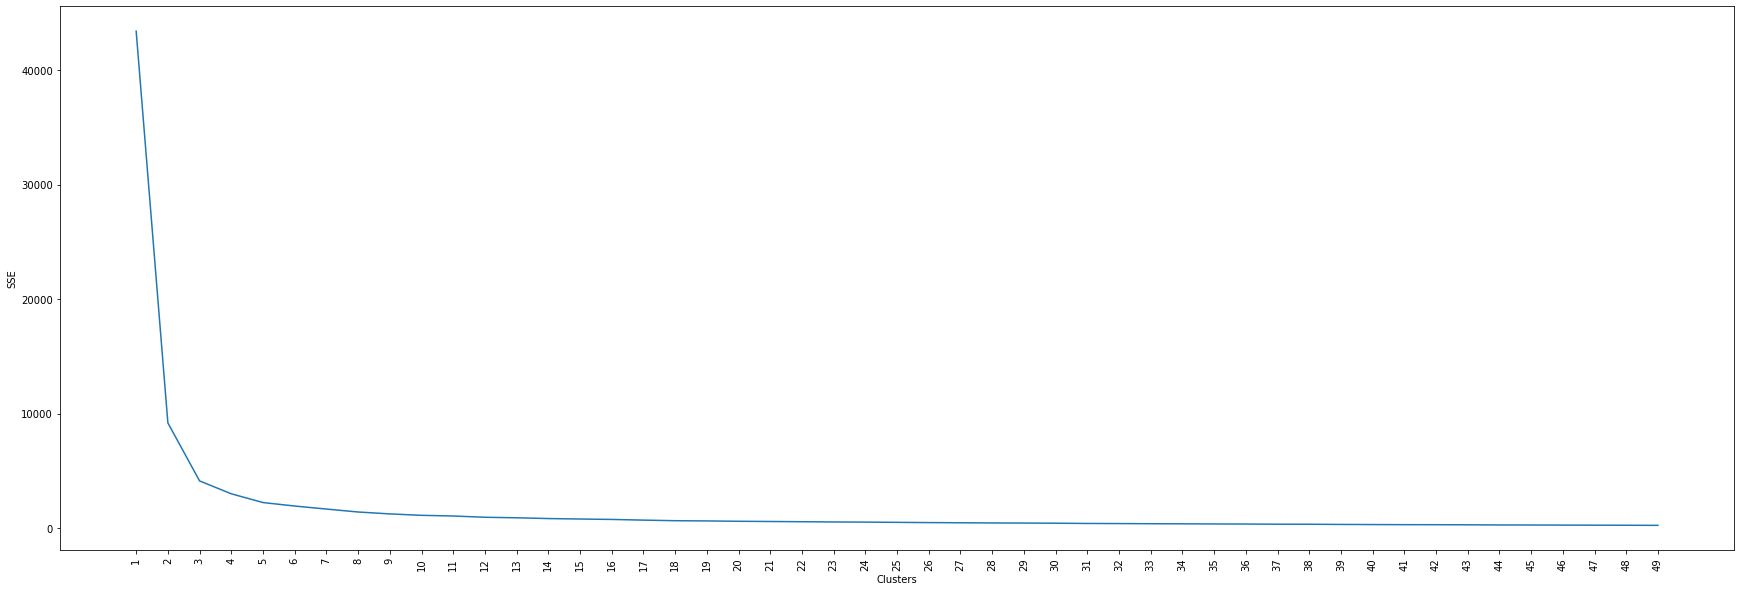

In [21]:
# testing the kmeans on user data

kmeansTrial(userData,50) #k = 5

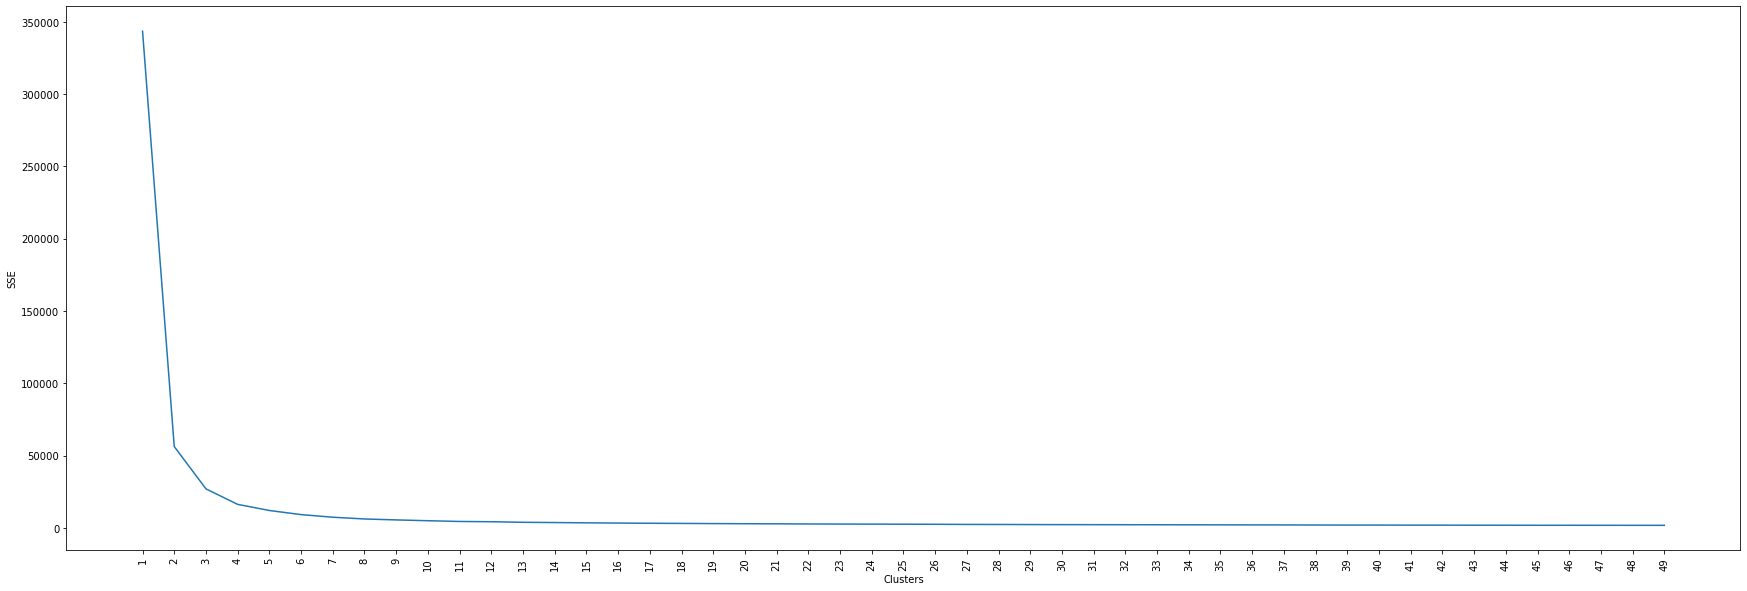

In [22]:
kmeansTrial(itemData,50) #k = 4

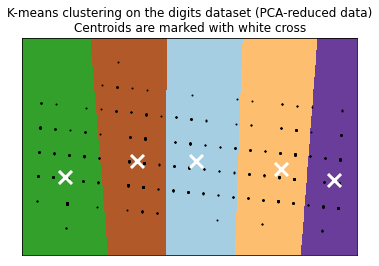

In [25]:
kmeansExecute(userData,5)

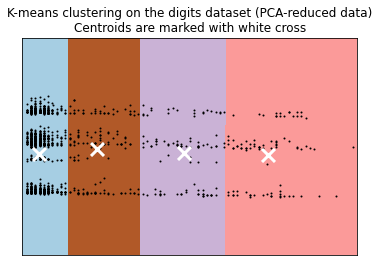

In [26]:
kmeansExecute(itemData,4)

In [ ]:
# TODO - make function to get similarity